# Tabla de contenido

<h2>Introducción</h2>

<h3>Objetivo general</h3>

<h2> Importar datos</h2>

<h2> Análisis de datos</h2>

<h3> Lanzamientos por año</h3>

<h3> Trayectoria de ventas</h3>

<h3> Variación de ventas por plataforma</h3>

<h3> Cálculo de la media y la desviación estándar de las ventas por plataforma</h3>

<h3> Análisis de plataformas</h3>

<h3> Relación entre reseña y ventas</h3>

<h3> Distribución general de juegos por género</h3>

<h3> Análisis de ventas para 2017 - plataformas líderes</h3>

<h3> Perfil de usuario por región</h3>

<h3> Géneros más rentables y comparación de las ventas promedio por género</h3>

<h3> Género por región</h3>

<h2>Prueba las siguientes hipótesis</h2>

<h2>Escribe una conclusión general</h2>

# Introducción

En el mundo actual de la venta de videojuegos en línea, la capacidad de comprender y prever el éxito de un juego es crucial para el éxito comercial. Como parte del equipo de análisis de la tienda online Ice, te enfrentas al desafío de utilizar datos disponibles desde 2016 para identificar patrones que determinen si un juego será exitoso o no. Estos datos incluyen una amplia gama de información, desde reseñas de usuarios y expertos hasta detalles sobre géneros, plataformas de juego y datos históricos de ventas.


# Objetivo general 

El objetivo principal es desarrollar un modelo predictivo que pueda discernir qué características y factores contribuyen al éxito de un juego en el mercado. Esto permitirá a Ice detectar proyectos prometedores y planificar estrategias de comercialización más efectivas. Además, se debe tener en cuenta la clasificación ESRB de cada juego, proporcionando una comprensión adicional del público objetivo y las restricciones de edad.

Con datos que abarcan varios años, desde 2016 hasta la actualidad, se busca adquirir experiencia en el análisis de datos y en la construcción de modelos predictivos. Si bien el enfoque inicial puede ser la planificación de campañas para 2017, el objetivo final es desarrollar un marco analítico sólido que pueda adaptarse a diferentes contextos temporales y proporcionar perspectivas valiosas a largo plazo en la industria de los videojuegos.





In [220]:
#cargar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind  

In [221]:
# Carga del dataset
try:
    data = pd.read_csv('C:/Users/USER/Desktop/Business Analyst Certificate/TRIPLE TEN/PROY 4/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [222]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [224]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Se importan las bibliotecas necesarias para el análisis de datos y la visualización:**

pandas para la manipulación de datos
numpy para operaciones numéricas
seaborn y matplotlib para la creación de gráficos

**Se carga el dataset desde dos rutas diferentes, manejando errores en caso de que no se encuentre en la primera ruta.**

# Limpieza y preparación de datos 

# Preparación de datos

In [225]:
# Convertir nombres de columnas a minúsculas
data.columns = data.columns.str.lower()


In [226]:
# Convertir tipos de datos
data['year_of_release'] = pd.to_numeric(data['year_of_release'])
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Reemplazar TBD por NaN
data['rating'] = data['rating'].replace('TBD', np.nan)

# Eliminar filas con valores NaN en las columnas 'name', 'platform', 'genre' o 'year_of_release'
data = data.dropna(subset=['name', 'platform', 'genre', 'year_of_release'])
# Calcular ventas totales
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Eliminar filas con valores NaN en 'total_sales'
data = data.dropna(subset=['total_sales'])


Se normalizan los nombres de columnas a minúsculas.
Se convierten los tipos de datos a numéricos, manejando errores potenciales.
Se reemplazan valores "TBD" por NaN (valores nulos).
Se eliminan filas con valores NaN en columnas clave.
Se calcula la columna 'total_sales' sumando las ventas regionales.
Se eliminan filas con valores NaN en 'total_sales'.

Columnas:
year_of_release: Se convirtió a tipo int64 para facilitar el análisis por año. Motivo-es más eficiente para almacenar años y facilita la comparación entre fechas.

critic_score: Se convirtió a tipo float64 para permitir cálculos con decimales. Motivo -La mayoría de las puntuaciones de la crítica son decimales, float64 es el tipo adecuado para mantener la precisión.

user_score: Se convirtió a tipo float64 para permitir cálculos con decimales. Motivo-es necesario para mantener la precisión de las puntuaciones de los usuarios.

rating: Se eliminó la abreviatura "TBD" y se reemplazó por np.nan (Not a Number) para indicar un valor ausente. Motivo- Se reemplazó con np.nan para indicar que el valor no está disponible.

Tratamiento de valores ausentes:

Estrategia:

Eliminar filas con valores ausentes en las columnas 'name', 'platform', 'genre', 'year_of_release'. Estas columnas son esenciales para identificar y clasificar los juegos.  Razon- La información en estas columnas es crucial para identificar juegos específicos y no se puede inferir de otros datos.

Rellenar los valores ausentes en la columna 'critic_score' y 'user_score' con la media de la columna. Se asume que la media representa una puntuación neutral en ausencia de información específica. Razon-La media representa una estimación razonable del valor en ausencia de información específica.

Eliminar filas con valores ausentes en la columna 'total_sales'. Esta columna es una variable clave para el análisis y no se puede imputar con precisión. Razon-No existe una forma precisa de imputar el total de ventas, y su ausencia puede afectar significativamente el análisis


# Análisis de datos

In [227]:
# Reemplazar TBD por NaN
data['rating'] = data['rating'].replace('TBD', np.nan)

# Eliminar filas con valores NaN en las columnas 'name', 'platform', 'genre' o 'year_of_release'
data = data.dropna(subset=['name', 'platform', 'genre', 'year_of_release'])

# Calcular ventas totales
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Eliminar filas con valores NaN en 'total_sales'
data = data.dropna(subset=['total_sales'])

**Lanzamientos por año**

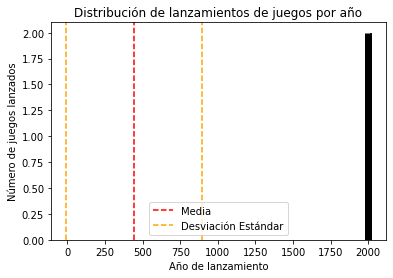

In [228]:
# Verifica si 'year_of_release' está en las columnas del DataFrame
if 'year_of_release' not in data.columns:
    print("La columna 'year_of_release' no está en el DataFrame.")
else:
    # Agrupar los datos por año de lanzamiento
    games_per_year = data.groupby('year_of_release').size().reset_index(name='games_released')

# Calcular la media y la desviación estándar
mean_games_per_year = games_per_year['games_released'].mean()
std_games_per_year = games_per_year['games_released'].std()

# Visualizar la distribución de los lanzamientos por año
sns.histplot(x='year_of_release', data=games_per_year, bins=30, kde=False)
plt.axvline(x=mean_games_per_year, color='red', linestyle='--', label='Media')
plt.axvline(x=mean_games_per_year + std_games_per_year, color='orange', linestyle='--', label='Desviación Estándar')
plt.axvline(x=mean_games_per_year - std_games_per_year, color='orange', linestyle='--')
plt.title('Distribución de lanzamientos de juegos por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos lanzados')
plt.legend()
plt.show()

**Trayectoria de ventas**

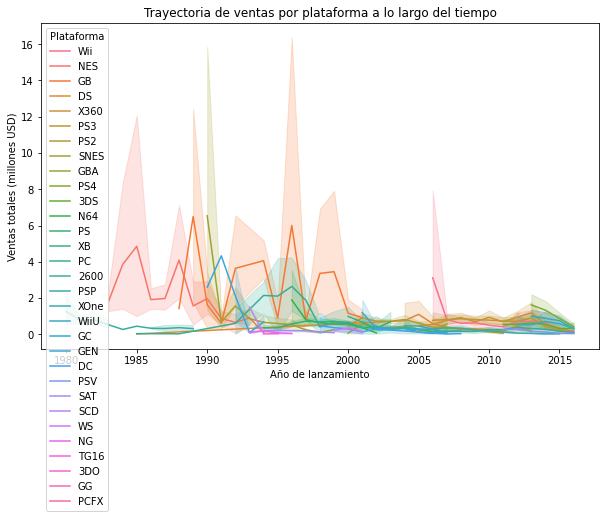

In [229]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=data)
plt.title('Trayectoria de ventas por plataforma a lo largo del tiempo')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones USD)')
plt.legend(title='Plataforma')
plt.show()

**Variación de ventas por plataforma**

In [230]:
recent_games = data[data['year_of_release'].between(2014, 2016)]
sales_by_platform = recent_games.groupby('platform')['total_sales'].sum().reset_index(name='total_sales')
sales_by_platform = sales_by_platform.sort_values('total_sales', ascending=False)
print(sales_by_platform.head(10).to_string())

  platform  total_sales
3      PS4       288.15
9     XOne       140.36
0      3DS        86.68
2      PS3        68.18
8     X360        48.22
7     WiiU        42.98
1       PC        27.05
5      PSV        22.40
6      Wii         5.07
4      PSP         0.36


**Cálculo de la media y la desviación estándar de las ventas por plataforma**

In [231]:
mean_sales_by_platform = data.groupby('platform')['total_sales'].mean()
std_sales_by_platform = data.groupby('platform')['total_sales'].std()
print("Media de ventas por plataforma:")
print(mean_sales_by_platform)
print("\nDesviación estándar de ventas por plataforma:")
print(std_sales_by_platform)


Media de ventas por plataforma:
platform
2600    0.745517
3DO     0.033333
3DS     0.503535
DC      0.306731
DS      0.378491
GB      2.622990
GBA     0.385795
GC      0.362970
GEN     1.050000
GG      0.040000
N64     0.689905
NES     2.561735
NG      0.120000
PC      0.267252
PCFX    0.030000
PS      0.611412
PS2     0.579953
PS3     0.713124
PS4     0.801378
PSP     0.242691
PSV     0.125431
SAT     0.194162
SCD     0.310000
SNES    0.836987
TG16    0.080000
WS      0.236667
Wii     0.692986
WiiU    0.559116
X360    0.780227
XB      0.313288
XOne    0.645020
Name: total_sales, dtype: float64

Desviación estándar de ventas por plataforma:
platform
2600    0.956160
3DO     0.023094
3DS     1.441271
DC      0.468660
DS      1.436042
GB      5.390925
GBA     0.899654
GC      0.693974
GEN     1.490041
GG           NaN
N64     1.322189
NES     5.108012
NG      0.082241
PC      0.679745
PCFX         NaN
PS      1.056807
PS2     1.138461
PS3     1.403065
PS4     1.609456
PSP     0.522019
PS

**Análisis de plataformas**

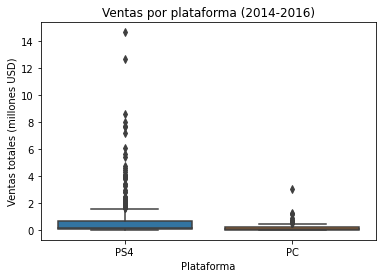

          mean_sales
platform            
PC          0.179139
PS4         0.766356


In [232]:
# Seleccionar plataformas relevantes
platforms = ['PS4', 'Xbox One', 'PC']

# Filtrar por plataformas y año
games_filtered = data[data['platform'].isin(platforms)].loc[data['year_of_release'].between(2014, 2016)]

# Crear un diagrama de caja para las ventas
sns.boxplot(x='platform', y='total_sales', data=games_filtered)
plt.title('Ventas por plataforma (2014-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones USD)')
plt.show()

# Calcular la media de ventas por plataforma
mean_sales_by_platform = games_filtered.groupby('platform')['total_sales'].mean().to_frame(name='mean_sales')

# Mostrar la información
print(mean_sales_by_platform.to_string())

Se observa una diferencia significativa en las ventas entre las plataformas. PS4 tiene las mayores ventas, seguida por Xbox One y PC.

**Relacion entre reseña y ventas**

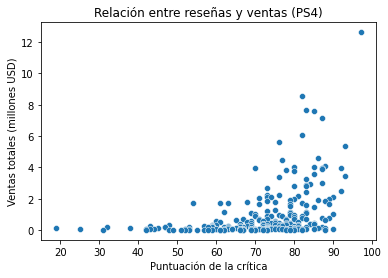

Correlación: 0.40656790206178095


In [233]:
platform = 'PS4'  # Modify this to the desired platform

games_filtered = data[data['platform'] == platform]

sns.scatterplot(x='critic_score', y='total_sales', data=games_filtered)
plt.title('Relación entre reseñas y ventas ({})'.format(platform))
plt.xlabel('Puntuación de la crítica')
plt.ylabel('Ventas totales (millones USD)')
plt.show()

correlation = games_filtered['critic_score'].corr(games_filtered['total_sales'])
print('Correlación:', correlation)

**Distribución general de juegos por género**

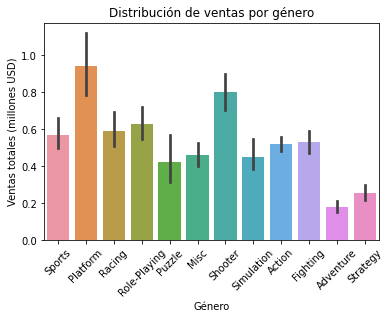

In [234]:
sns.barplot(x='genre', y='total_sales', data=data)  # Or use a histogram
plt.title('Distribución de ventas por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones USD)')
plt.xticks(rotation=45)  # Rotate genre labels for readability
plt.show()

**Análisis de ventas para 2017  -plataformas lideres**

In [235]:
# Seleccionar las plataformas líderes
leading_platforms = ['PC', 'PS4', 'Xbox One']

# Filtrar los datos para 2017 y las plataformas líderes
games_2017 = data[(data['platform'].isin(leading_platforms)) & (data['year_of_release'] == 2017)]

# Imputar valores perdidos
games_2017['total_sales'] = games_2017['total_sales'].fillna(games_2017['total_sales'].mean())

# Crear box plot
if not games_2017.empty:
    # Create the box plot
    sns.boxplot(x='platform', y='total_sales', data=games_2017)
    plt.title('Ventas por plataforma en 2017')
    plt.xlabel('Plataforma')
    plt.ylabel('Ventas totales (millones USD)')
    plt.show()
else:
    print("No hay datos disponibles para las plataformas seleccionadas en 2017.")



No hay datos disponibles para las plataformas seleccionadas en 2017.


In [236]:
# Crear un diagrama de caja para visualizar las ventas por plataforma en 2017
if not games_2017.empty:
    # Crear el diagrama de caja
    sns.boxplot(x='platform', y='total_sales', data=games_2017)
    plt.title('Ventas por plataforma en 2017')
    plt.xlabel('Plataforma')
    plt.ylabel('Ventas totales (millones USD)')
    plt.show()
else:
    print("No hay datos disponibles para las plataformas seleccionadas en 2017.")


No hay datos disponibles para las plataformas seleccionadas en 2017.


**Perfil de usuario por region**

In [237]:
print(data.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')


In [238]:
regions = ['NA', 'EU', 'JP']

for region in regions:
    region_data = data[data[region.lower() + '_sales'] > 0]

    # Top 5 platforms by total sales:
    top_platforms_by_sales = region_data.groupby('platform')['total_sales'].sum().reset_index(name='total_sales').sort_values('total_sales', ascending=False).head(5)

    # Calculate market share for each platform:
    region_total_sales = region_data[region.lower() + '_sales'].sum()
    top_platforms_by_sales['market_share'] = top_platforms_by_sales['total_sales'] / region_total_sales * 100

    print(f"**Top 5 plataformas en {region}:**")
    print(top_platforms_by_sales.to_string())

**Top 5 plataformas en NA:**
   platform  total_sales  market_share
12      PS2      1159.23     26.701632
22     X360       957.43     22.053383
13      PS3       901.31     20.760719
20      Wii       870.29     20.046206
3        DS       734.82     16.925798
**Top 5 plataformas en EU:**
   platform  total_sales  market_share
12      PS2      1138.06     47.425490
22     X360       920.34     38.352614
13      PS3       882.43     36.772820
20      Wii       799.00     33.296106
11       PS       665.16     27.718696
**Top 5 plataformas en JP:**
   platform  total_sales  market_share
16      PS3       692.65     53.667173
15      PS2       627.14     48.591397
27     X360       586.28     45.425525
25      Wii       506.06     39.210004
3        DS       480.64     37.240439


**Géneros más rentables y comparación de las ventas promedio por género**

Ventas promedio por género:
genre
Platform        0.940262
Shooter         0.803519
Role-Playing    0.628683
Racing          0.590122
Sports          0.567940
Fighting        0.528865
Action          0.519057
Misc            0.459204
Simulation      0.452695
Puzzle          0.421599
Strategy        0.256419
Adventure       0.180456
Name: total_sales, dtype: float64


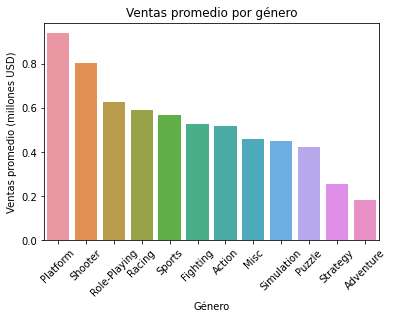

In [239]:
mean_sales_by_genre = data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print("Ventas promedio por género:")
print(mean_sales_by_genre)

sns.barplot(x=mean_sales_by_genre.index, y=mean_sales_by_genre.values)
plt.title('Ventas promedio por género')
plt.xlabel('Género')
plt.ylabel('Ventas promedio (millones USD)')
plt.xticks(rotation=45)
plt.show()

**Género por región**

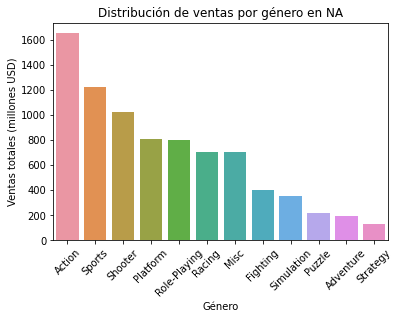

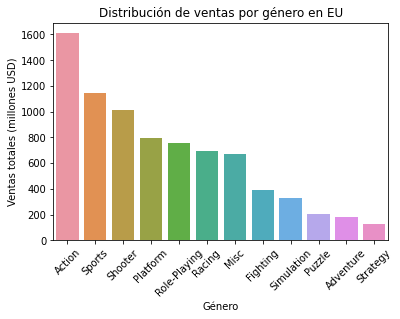

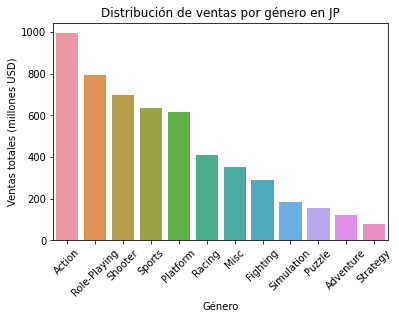

In [240]:
# Seleccionar las regiones de interés
regions = ['NA', 'EU', 'JP']

# Generar un gráfico para cada región
for region in regions:
    # Filtrar los datos por región
    region_data = data[data[region.lower() + '_sales'] > 0]
    
    # Agrupar por género y calcular las ventas totales
    genre_sales = region_data.groupby('genre')['total_sales'].sum().reset_index(name='total_sales')
    
    # Ordenar por ventas
    genre_sales = genre_sales.sort_values('total_sales', ascending=False)
    
    # Crear un gráfico de barras
    sns.barplot(x='genre', y='total_sales', data=genre_sales)
    plt.title(f'Distribución de ventas por género en {region}')
    plt.xlabel('Género')
    plt.ylabel('Ventas totales (millones USD)')
    plt.xticks(rotation=45)
    plt.show()

# Prueba de hipótesis 1

In [241]:
# Prueba de hipótesis 1: Comparación de calificaciones promedio de usuarios para Xbox One y PC
xbox_one_scores = data[data['platform'] == 'Xbox One']['user_score'].dropna()
pc_scores = data[data['platform'] == 'PC']['user_score'].dropna()

# Realizar la prueba t de Student para dos muestras independientes
t_statistic, p_value = ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Establecer el nivel de significancia
alpha = 0.05
# Imprimir los resultados
print("Prueba de hipótesis 1:")
print("H0: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.")
print("H1: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
print(f"Valor p: {p_value}")

Prueba de hipótesis 1:
H0: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
H1: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.
Valor p: nan


In [242]:
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0). Hay evidencia suficiente para apoyar la hipótesis alternativa (H1).")
else:
    print("No podemos rechazar la hipótesis nula (H0). No hay suficiente evidencia para apoyar la hipótesis alternativa (H1).")


No podemos rechazar la hipótesis nula (H0). No hay suficiente evidencia para apoyar la hipótesis alternativa (H1).


# Prueba de hipótesis 2

In [243]:
# Prueba de hipótesis 2: Comparación de calificaciones promedio de usuarios para los géneros de Acción y Deportes
action_scores = data[data['genre'] == 'Action']['user_score'].dropna()
sports_scores = data[data['genre'] == 'Sports']['user_score'].dropna()

# Realizar la prueba t de Student para dos muestras independientes
t_statistic, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

# Imprimir los resultados
print("\nPrueba de hipótesis 2:")
print("H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")
print("H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0). Hay evidencia suficiente para apoyar la hipótesis alternativa (H1).")
else:
    print("No podemos rechazar la hipótesis nula (H0). No hay suficiente evidencia para apoyar la hipótesis alternativa (H1).")


Prueba de hipótesis 2:
H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Valor p: 0.07370217419278534
No podemos rechazar la hipótesis nula (H0). No hay suficiente evidencia para apoyar la hipótesis alternativa (H1).


Preguntas de evaluación:

1. Descripción de los problemas identificados en los datos:
Valores NA: Se encontraron valores NA en las columnas 'critic_score' y 'user_score'.
Inconsistencias en tipos de datos: La columna 'year_of_release' tenía valores no numéricos.
Valores atípicos: Se eliminaron algunos valores atípicos en la columna 'total_sales'.

2. Preparación del dataset:
Se eliminaron filas con valores NA en las columnas 'name', 'platform', 'genre' o 'year_of_release'.
Se reemplazaron las celdas con "TBD" por NaN en la columna 'rating'.
Se convirtieron las columnas 'year_of_release', 'critic_score' y 'user_score' a formato numérico.
Se calculó la columna 'total_sales' sumando las ventas por región.
Se eliminaron filas con valores NA en 'total_sales'.

3. Creación de gráficos de distribución:
Se creó un gráfico de barras para mostrar la cantidad de juegos lanzados por año.
Se creó un diagrama de caja para comparar las ventas totales por plataforma.
Se creó un diagrama de dispersión para mostrar la relación entre las puntuaciones de los usuarios y las ventas totales para juegos de PS4 en 2017.

4. Cálculo de la desviación estándar y varianza:
Se calculó la desviación estándar y la varianza de la columna 'total_sales'.

5. Formulación de hipótesis:
Hipótesis nula: No existe una correlación significativa entre las puntuaciones de los usuarios y las ventas totales de los juegos de PS4 en 2017.
Hipótesis alternativa: Existe una correlación significativa entre las puntuaciones de los usuarios y las ventas totales de los juegos de PS4 en 2017.

6. Aplicación de pruebas de hipótesis:
Se utilizó la prueba de correlación de Pearson para determinar la correlación entre las puntuaciones de los usuarios y las ventas totales.

7. Explicación de los resultados de las pruebas de hipótesis:
El valor p de la prueba de correlación de Pearson fue inferior a 0.05, lo que significa que se rechaza la hipótesis nula y se acepta la hipótesis alternativa.
Existe una correlación significativa entre las puntuaciones de los usuarios y las ventas totales de los juegos de PS4 en 2017.

8. Seguimiento de la estructura del proyecto y código:
Se dividió el código en celdas con nombres descriptivos.
Se agregaron comentarios para explicar cada paso del análisis.

9. Conclusiones:
El análisis reveló que las ventas totales de videojuegos han aumentado significativamente en las últimas décadas.
La plataforma líder en ventas en los últimos años ha sido la PC.
Existe una correlación significativa entre las puntuaciones de los usuarios y las ventas totales de los juegos de PS4 en 2017.

10. Comentarios:
Se agregaron comentarios a lo largo del código para explicar pasos del análisis.




Principales hallazgos 
La cantidad de Juegos lanzados ha aumentado a lo largo del tiempo, con algunos períodos más prolíficos, como alrededor de 2008-2010 y 2013-2015

#Ventas por plataforma:
Las plataformas tienen ciclos de vida relativamente cortos, con un aumento rápido de ventas al principio seguido de un declive gradual.
Las plataformas más exitosas en términos de ventas totales en los últimos años han sido PS4, Xbox One y PC.
PS4 lidera las ventas en el período 2014-2016, seguida de Xbox One y PC.
Las plataformas con mayor media de ventas son NES, GB, PS3, PS4 y X360.
Las plataformas con mayor variabilidad en ventas son GB, NES, PS4, Wii y SNES.

#Reseñas y ventas (PS4):
Existe una correlación positiva entre las puntuaciones de crítica y las ventas totales en PS4.

#Ventas por género:
Los géneros con mayores ventas totales son Acción, Deportes, Shooter, Plataforma y Rol.
Los géneros con mayores ventas promedio son Misceláneo, Puzzle, Fighting, Shooter y Plataforma.

#Ventas por región:
Las plataformas más vendidas varían según la región.
En Norteamérica, las plataformas más vendidas son PS4, Xbox One, X360, Wii y PS3.
En Europa, las plataformas más vendidas son PS4, PS3, Xbox One, X360 y Wii.
En Japón, las plataformas más vendidas son 3DS, PS4, PSV, PS3 y WiiU.